SUPPORT VECTOR REGRESSOR.

SVR is a type of support vector machine that is designed to carry out regression tasks. Its a suppervised machine learning algorithm that uses a hyperplane to determine class/value of an unknown value. Its comparable to a line of best fit in linear regression, it a line that gives the largest separation between classes. Given a set of datapoints (dimensional vector) belonging to two classes(red and blue below), a linear classifier is generated to separate them into different classes. Multiple hyperplanes are drawn but one that represents the largest margin is selected. In diagram below, H2 best separates the two groups as compared to H1. The distance between this line, illustrated by short blue connecting data points to H2, and the closest data point, circled in diagram, on either classes is maximised, these points are claled support vectors and guide drawing of a boundary differentiating classes. The best hyperplane is one with the largest distance to the nearest training data point of any class, resulting to a lower generalisation error and inturn low risk pof overfitting.     

<center><img src="../images/Support_vector_machine.png" width=600px height=400px /></center>

A support vector machine needs a kernel which is a fuction used to determine similarities between input data, when there is a linear relationship a linear kernel is used while for non-liniear relatioships prefer non-linear. The later is more complex, basically the characteristics of data and nature of complexity guides this process. 

In this example, we will implementation Support Vector Regression (SVM) in predicting voter turnout for 2020 elections in the US counties based on a set of predictor varaiables such as historical turn out data, county population, household income , poverty levels just but a few. We will train the model to understan the relationship between these variables and voter turnout then have the model predict an unseen data. 

<center><img src="../images/predictor_variables_SVR.png" width=800px height=400px /></center>


# 1. Data Preparation.

We have a data of US counties with election results for the year 2020. Lets import and perform some pre-processing techniques before passing it to the model. 



In [1]:
# Import Required libraries. 
import pandas as pd 
import geopandas as gpd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data 
path = 'F:/Programs/Secrets of ML/Data/US_Elections.gpkg'

# Read data containing county polygons. 
data = gpd.read_file(path, layer='US_CountyElections_clean')

data.columns

Columns : Index(['county_FIPS', 'name', 'population', 'state_abbr', 'state_fips',
       'state_name', 'voter_turnout_2008', 'voter_turnout_2012',
       'voter_turnout_2016', 'voter_turnout_2020', '2022_median_age',
       '2022_per_capitalincome', 'perc_2022_age_25+_no_diploma/highschool',
       'perc_2022_age_25+_with_bachelors_degree', '2022_avg_disposable_income',
       'lifemode_5', 'region', 'geometry'],
      dtype='object')


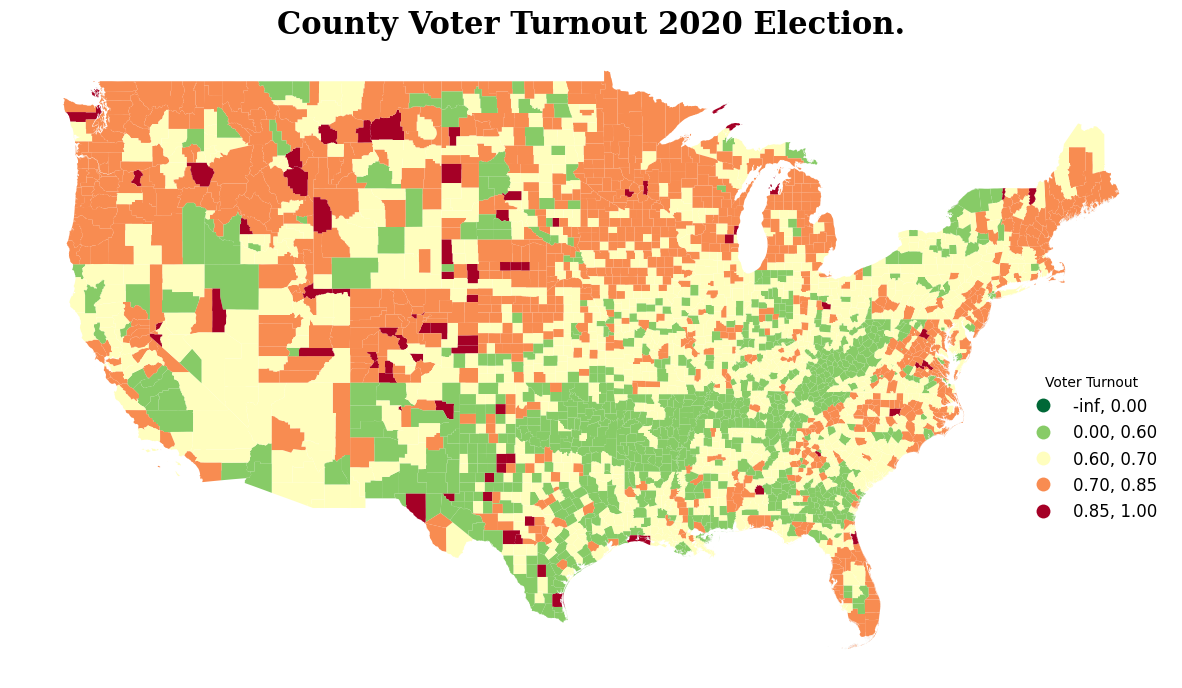

In [29]:
# Plot choropleth map of voter turn out in the year 2020.  
print(f'Columns : {data.columns}')

# Legend Parameters 
legend_kwds= {
  'loc': 'best',
  'bbox_to_anchor': (0.5, 0., 0.5, 0.5),
  #'fmt': '{:<5.0f}',
  'frameon': False,
  'fontsize': 12,
  'title': 'Voter Turnout'
}

# Legend bins 
classification_kwds={
  'bins':[0, 0.6, 0.7, 0.85, 1]
}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,15)
data.plot(ax=ax, column='voter_turnout_2020', cmap='RdYlGn_r', scheme='User_Defined',
         classification_kwds=classification_kwds, legend=True, legend_kwds=legend_kwds)

# Remove axis 
ax.set_axis_off()

# Add a title
ax.set_title('County Voter Turnout 2020 Election.', fontsize=22, fontweight='bold', 
          fontfamily='serif', color='black')

plt.show()

In [38]:
# Data properties 

# Check missing and null values in the dataframe . data type objects,  
print(f'Columns features :\n  {data.info()} \n\n ----------------------------\n')

# Distribution on numerical data 
print(f'Numerical variables distributions : \n {data.describe()} \n\n ----------------------------\n')

# Data sample 
print(f'Data head :\n {data.head(2)}')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   county_FIPS                              3108 non-null   object  
 1   name                                     3108 non-null   object  
 2   population                               3108 non-null   int64   
 3   state_abbr                               3108 non-null   object  
 4   state_fips                               3108 non-null   object  
 5   state_name                               3108 non-null   object  
 6   voter_turnout_2008                       3108 non-null   float64 
 7   voter_turnout_2012                       3108 non-null   float64 
 8   voter_turnout_2016                       3108 non-null   float64 
 9   voter_turnout_2020                       3108 non-null   float64 
 10  2022_median_age             